In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('punkt')

from nltk import word_tokenize,sent_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
import nltk

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anude\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [5]:
data = pd.read_csv('C:/Users/anude/Downloads/Datasets/spam.csv', encoding="ISO-8859-1")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
data.rename(columns={'v1':'target','v2':'sms'}, inplace=True)
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)

In [7]:
data.head()

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data.duplicated().sum()

403

In [9]:
data.drop_duplicates(inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5169 non-null   object
 1   sms     5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


ham     4516
spam     653
Name: target, dtype: int64


<AxesSubplot:xlabel='target', ylabel='count'>

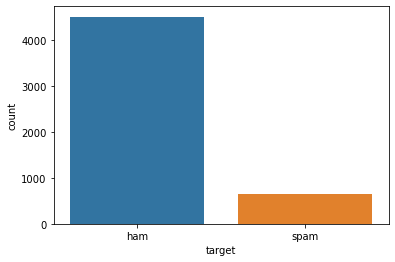

In [10]:
# lets check if data is imbalanced
print(data.target.value_counts())

# also see on the graph
sns.countplot(x='target', data=data)

In [13]:
data['no of character'] = data.sms.apply(lambda x: len(x))
data['no of words'] = data.sms.apply(lambda x: len(nltk.word_tokenize(x)))
data['no of sentence'] = data.sms.apply(lambda x: len(nltk.sent_tokenize(x)))

data.describe()

,no of character,no of words,no of sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


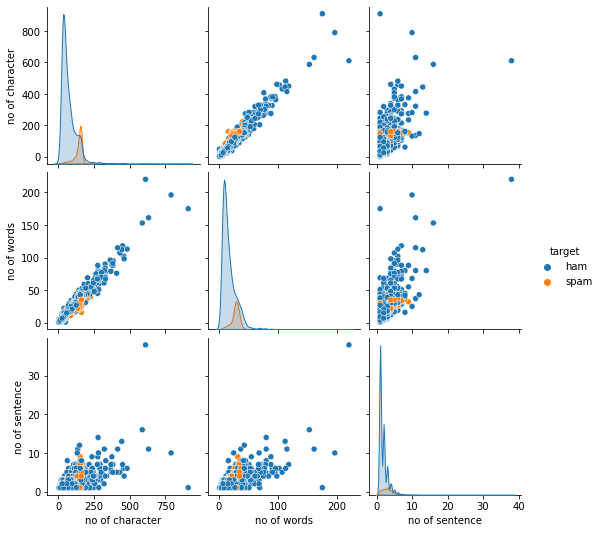

In [14]:
sns.pairplot(data, hue='target')


In [20]:
X = data['sms']
y = data['target']

In [21]:
cv = CountVectorizer()
cvdf = cv.fit_transform(X)

In [22]:
print(cvdf.shape)
print(y.shape)

(5169, 8672)
(5169,)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(cvdf, y, test_size=0.3, random_state=42)

In [24]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

# check cross validation score
cv_score = cross_val_score(mnb, X_train,y_train,scoring='accuracy',cv=10)
print(cv_score.mean())

# model metrics
pred_test = mnb.predict(X_test)
print(classification_report(y_test,pred_test))

0.9784407952128067
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1331
        spam       0.94      0.93      0.93       220

    accuracy                           0.98      1551
   macro avg       0.96      0.96      0.96      1551
weighted avg       0.98      0.98      0.98      1551



In [25]:
message1 = "Hey, call ur mom she is worried"
message2 = "YOU ARE CHOSEN TO RECEIVE A å£350 AWARD! Pls call claim to collect your award which you are selected to receive as a valued mobile customer."

In [29]:
def cleanText(text):
    # change character in lower-case
    sms = text.lower()
    # remove non alpha-numeric character
    sms = re.sub('[^0-9a-z]',' ',sms)
    # splitting words
    sms = sms.split()
    # join all words with space in between
    sms = ' '.join(sms)
    
    return sms


data['cleanSMS'] = data['sms'].apply(cleanText)

In [30]:
m1 = cleanText(message1)
m2 = cleanText(message2)

m1 = [m1]
m2 = [m2]

In [31]:
print(mnb.predict(cv.transform(m1)))
print(mnb.predict(cv.transform(m2)))

['ham']
['spam']
